In this project I've pulled some Mexico livestock data from the Food and Agriculture Organization of the United Nations to exemplify how I like to break a data set down into desired subsets and then create visualization grids which provide a comparable and contrastable bird's eye view of trends over time across related categories or products. This can be customized according to needs and I'm always finding new and improved ways to break down and visualize data.

In [1]:
#importing the tools for the job and the data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
%matplotlib inline
mex_ls = pd.read_csv('downloads/mexlivestock.csv')

In [2]:
#make sure the columns are good to go
mex_ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711 entries, 0 to 1710
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       1711 non-null   object 
 1   Domain            1711 non-null   object 
 2   Area Code (FAO)   1711 non-null   int64  
 3   Area              1711 non-null   object 
 4   Element Code      1711 non-null   int64  
 5   Element           1711 non-null   object 
 6   Item Code (CPC)   1711 non-null   float64
 7   Item              1711 non-null   object 
 8   Year Code         1711 non-null   int64  
 9   Year              1711 non-null   int64  
 10  Unit              1711 non-null   object 
 11  Value             1711 non-null   int64  
 12  Flag              1499 non-null   object 
 13  Flag Description  1711 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 187.3+ KB


In [3]:
#a look at the top of the data set 
mex_ls.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,SL,Livestock Primary,138,Mexico,5510,Production,231.0,"Eggs, hen, in shell",2014,2014,tonnes,2567199,NaN,Official data
1,SL,Livestock Primary,138,Mexico,5510,Production,231.0,"Eggs, hen, in shell",2015,2015,tonnes,2652530,NaN,Official data
2,SL,Livestock Primary,138,Mexico,5510,Production,231.0,"Eggs, hen, in shell",2016,2016,tonnes,2720194,NaN,Official data
3,SL,Livestock Primary,138,Mexico,5510,Production,231.0,"Eggs, hen, in shell",2017,2017,tonnes,2771198,NaN,Official data
4,SL,Livestock Primary,138,Mexico,5510,Production,231.0,"Eggs, hen, in shell",2018,2018,tonnes,2871918,NaN,Official data


In [4]:
#a look at the bottom of the data set
mex_ls.tail()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
1706,SL,Livestock Primary,138,Mexico,281,Fats/Year,2920.0,"Snails, not sea",2014,2014,tonnes,0,Fc,Calculated data
1707,SL,Livestock Primary,138,Mexico,281,Fats/Year,2920.0,"Snails, not sea",2015,2015,tonnes,0,Fc,Calculated data
1708,SL,Livestock Primary,138,Mexico,281,Fats/Year,2920.0,"Snails, not sea",2016,2016,tonnes,0,Fc,Calculated data
1709,SL,Livestock Primary,138,Mexico,281,Fats/Year,2920.0,"Snails, not sea",2017,2017,tonnes,0,Fc,Calculated data
1710,SL,Livestock Primary,138,Mexico,281,Fats/Year,2920.0,"Snails, not sea",2018,2018,tonnes,0,Fc,Calculated data


In [5]:
#dropping unnecessary columns
mex_ls.drop(['Domain','Domain Code','Area Code (FAO)', 'Element Code', 'Item Code (CPC)', 'Year Code', 'Flag'],axis=1,inplace=True)

In [6]:
#various elements
mex_ls['Element'].unique()

array(['Production', 'Import Quantity', 'Export Quantity', 'Seed', 'Loss',
       'Residuals', 'Food supply quantity (tonnes)',
       'Food supply (kcal/capita/day)',
       'Food supply quantity (g/capita/day)',
       'Protein supply quantity (g/capita/day)',
       'Fat supply quantity (g/capita/day)', 'Calories/Year',
       'Proteins/Year', 'Fats/Year', 'Processed', 'Opening stocks',
       'Stock Variation', 'Other uses (non-food)'], dtype=object)

In [7]:
#various items which are all found within each element
mex_ls['Item'].unique()

array(['Eggs, hen, in shell', 'Eggs, other bird, in shell', 'Fat, cattle',
       'Fat, goats', 'Fat, pigs', 'Fat, sheep', 'Honey, natural',
       'Meat nes', 'Meat, cattle', 'Meat, chicken', 'Meat, duck',
       'Meat, goat', 'Meat, goose and guinea fowl', 'Meat, horse',
       'Meat, pig', 'Meat, rabbit', 'Meat, sheep', 'Meat, turkey',
       'Milk, whole fresh cow', 'Milk, whole fresh goat',
       'Milk, whole fresh sheep', 'Offals nes', 'Offals, edible, cattle',
       'Offals, edible, goats', 'Offals, horses', 'Offals, liver chicken',
       'Offals, liver geese', 'Offals, liver turkeys',
       'Offals, pigs, edible', 'Offals, sheep,edible', 'Snails, not sea'],
      dtype=object)

In [18]:
#here I break down the dataframe into a dictionary of elements and then create a sub-dictionary of items for each element, sorting the items by the sum of their value(tonnage) over the years contained in the data in descending order to rank importance upon review and visualization
df_dict = {}
for element in mex_ls['Element'].unique(): 
    sliced = mex_ls[mex_ls['Element'] == element].copy()
    item_dict = {}
    #the groupby lists the items in order by their overall value as mentioned above
    for item in sliced.groupby('Item').sum().sort_values('Value',ascending=False).index:
        df = sliced[sliced['Item'] == item].copy()
        item_dict[item] = df
    df_dict[element] = item_dict

In [19]:
#here's what the keys within each element dictionary look like, and each key is paired with a dataframe as the value
df_dict['Production'].keys()

dict_keys(['Milk, whole fresh cow', 'Meat, chicken', 'Eggs, hen, in shell', 'Meat, cattle', 'Meat, pig', 'Offals, edible, cattle', 'Milk, whole fresh goat', 'Offals, pigs, edible', 'Fat, pigs', 'Meat, horse', 'Fat, cattle', 'Meat, sheep', 'Honey, natural', 'Milk, whole fresh sheep', 'Meat, goat', 'Meat, duck', 'Meat, turkey', 'Offals, horses', 'Offals, sheep,edible', 'Offals, edible, goats', 'Meat, rabbit', 'Fat, sheep', 'Fat, goats', 'Offals nes', 'Eggs, other bird, in shell'])

In [20]:
#here's an example of how each element/item can be accessed
df_dict['Production']['Meat, cattle']

,Area,Element,Item,Year,Unit,Value,Flag Description
408,Mexico,Production,"Meat, cattle",2014,tonnes,1827152,Official data
409,Mexico,Production,"Meat, cattle",2015,tonnes,1845236,Official data
410,Mexico,Production,"Meat, cattle",2016,tonnes,1878705,Official data
411,Mexico,Production,"Meat, cattle",2017,tonnes,1926901,Official data
412,Mexico,Production,"Meat, cattle",2018,tonnes,1980846,Official data


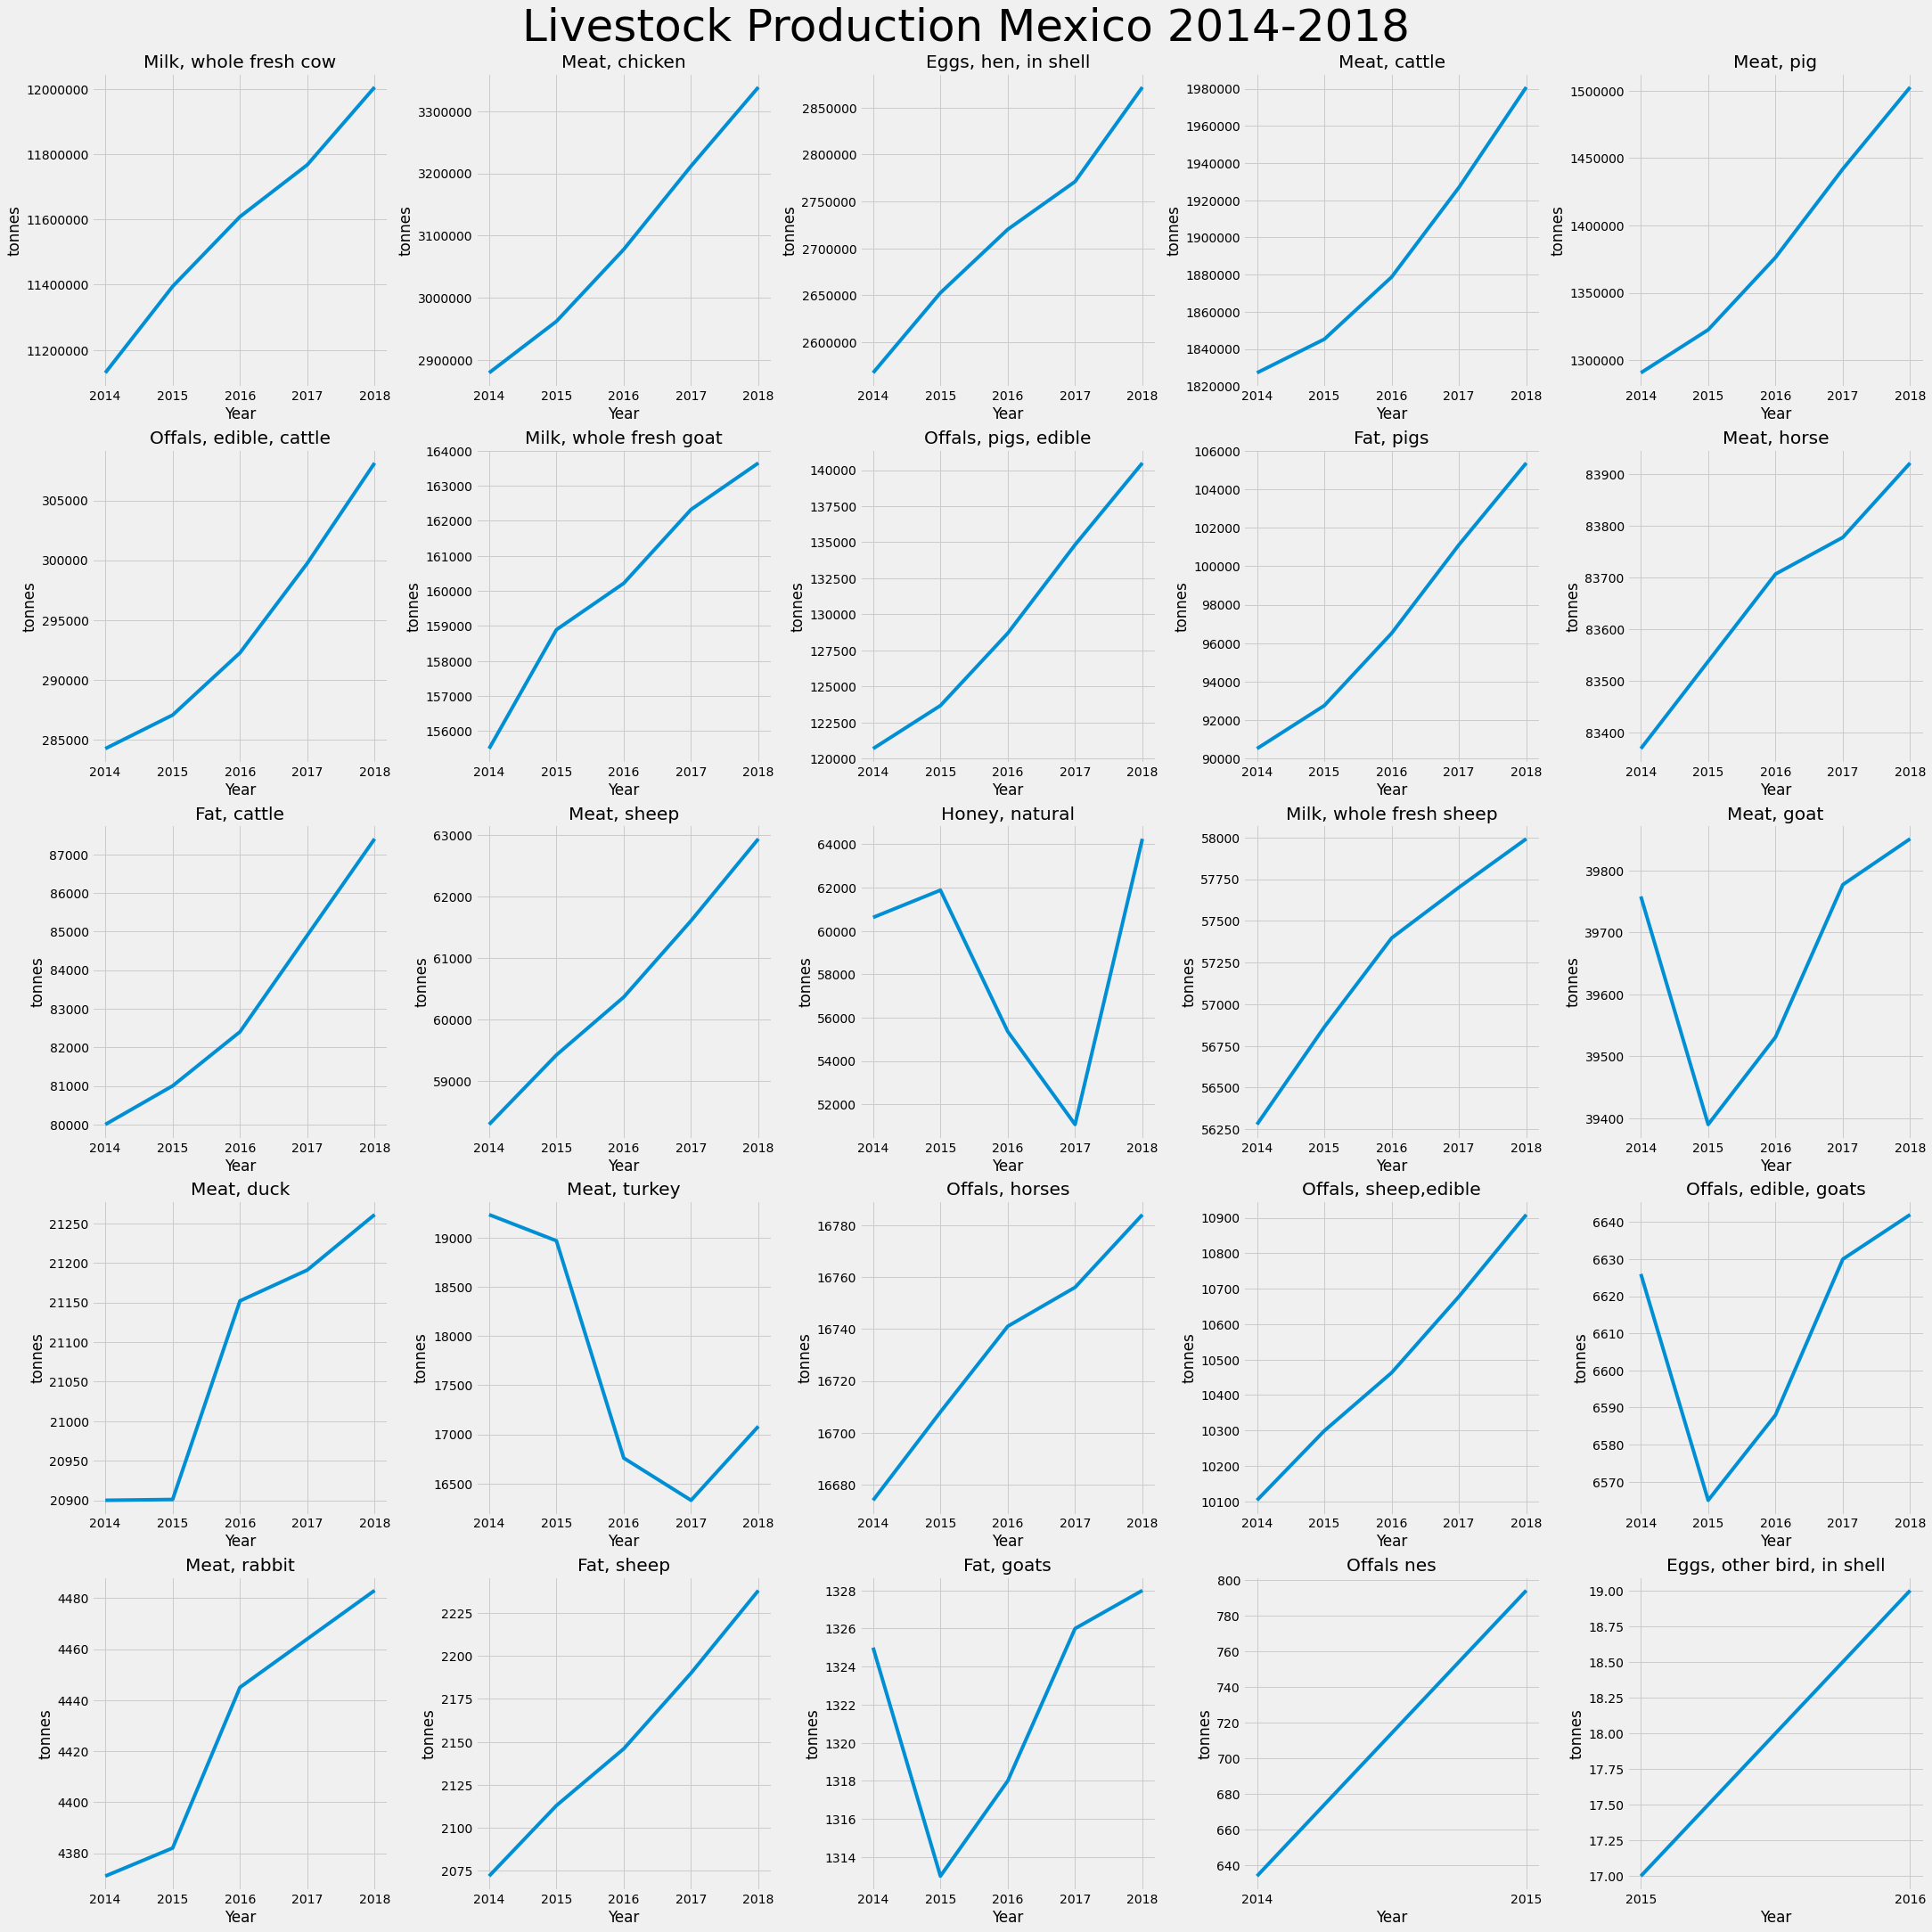

In [35]:
#Here's the plotting. I've used subplots and a loop to churn out the whole range of data within the category, ordered by tonnage as per the dictionary production in the code above

dfs_production = df_dict['Production'].copy()

plt.style.use('fivethirtyeight')

fig, axs = plt.subplots(5,5,figsize=(30,30),constrained_layout=True)
coord = (0,1,2,3,4)
coords = product(coord, coord)

for (key,df),i in zip(dfs_production.items(), coords):
    axs[i].plot(df['Year'],df['Value'])
    axs[i].set_title('{}'.format(key))
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('{}'.format(df['Unit'].iloc[1]))
    axs[i].set_xticks(range(df['Year'].min(), df['Year'].max()+1, 1))
    axs[i].ticklabel_format(style='plain')

fig.suptitle('Livestock Production Mexico 2014-2018',fontsize=50)    
    
plt.show()   

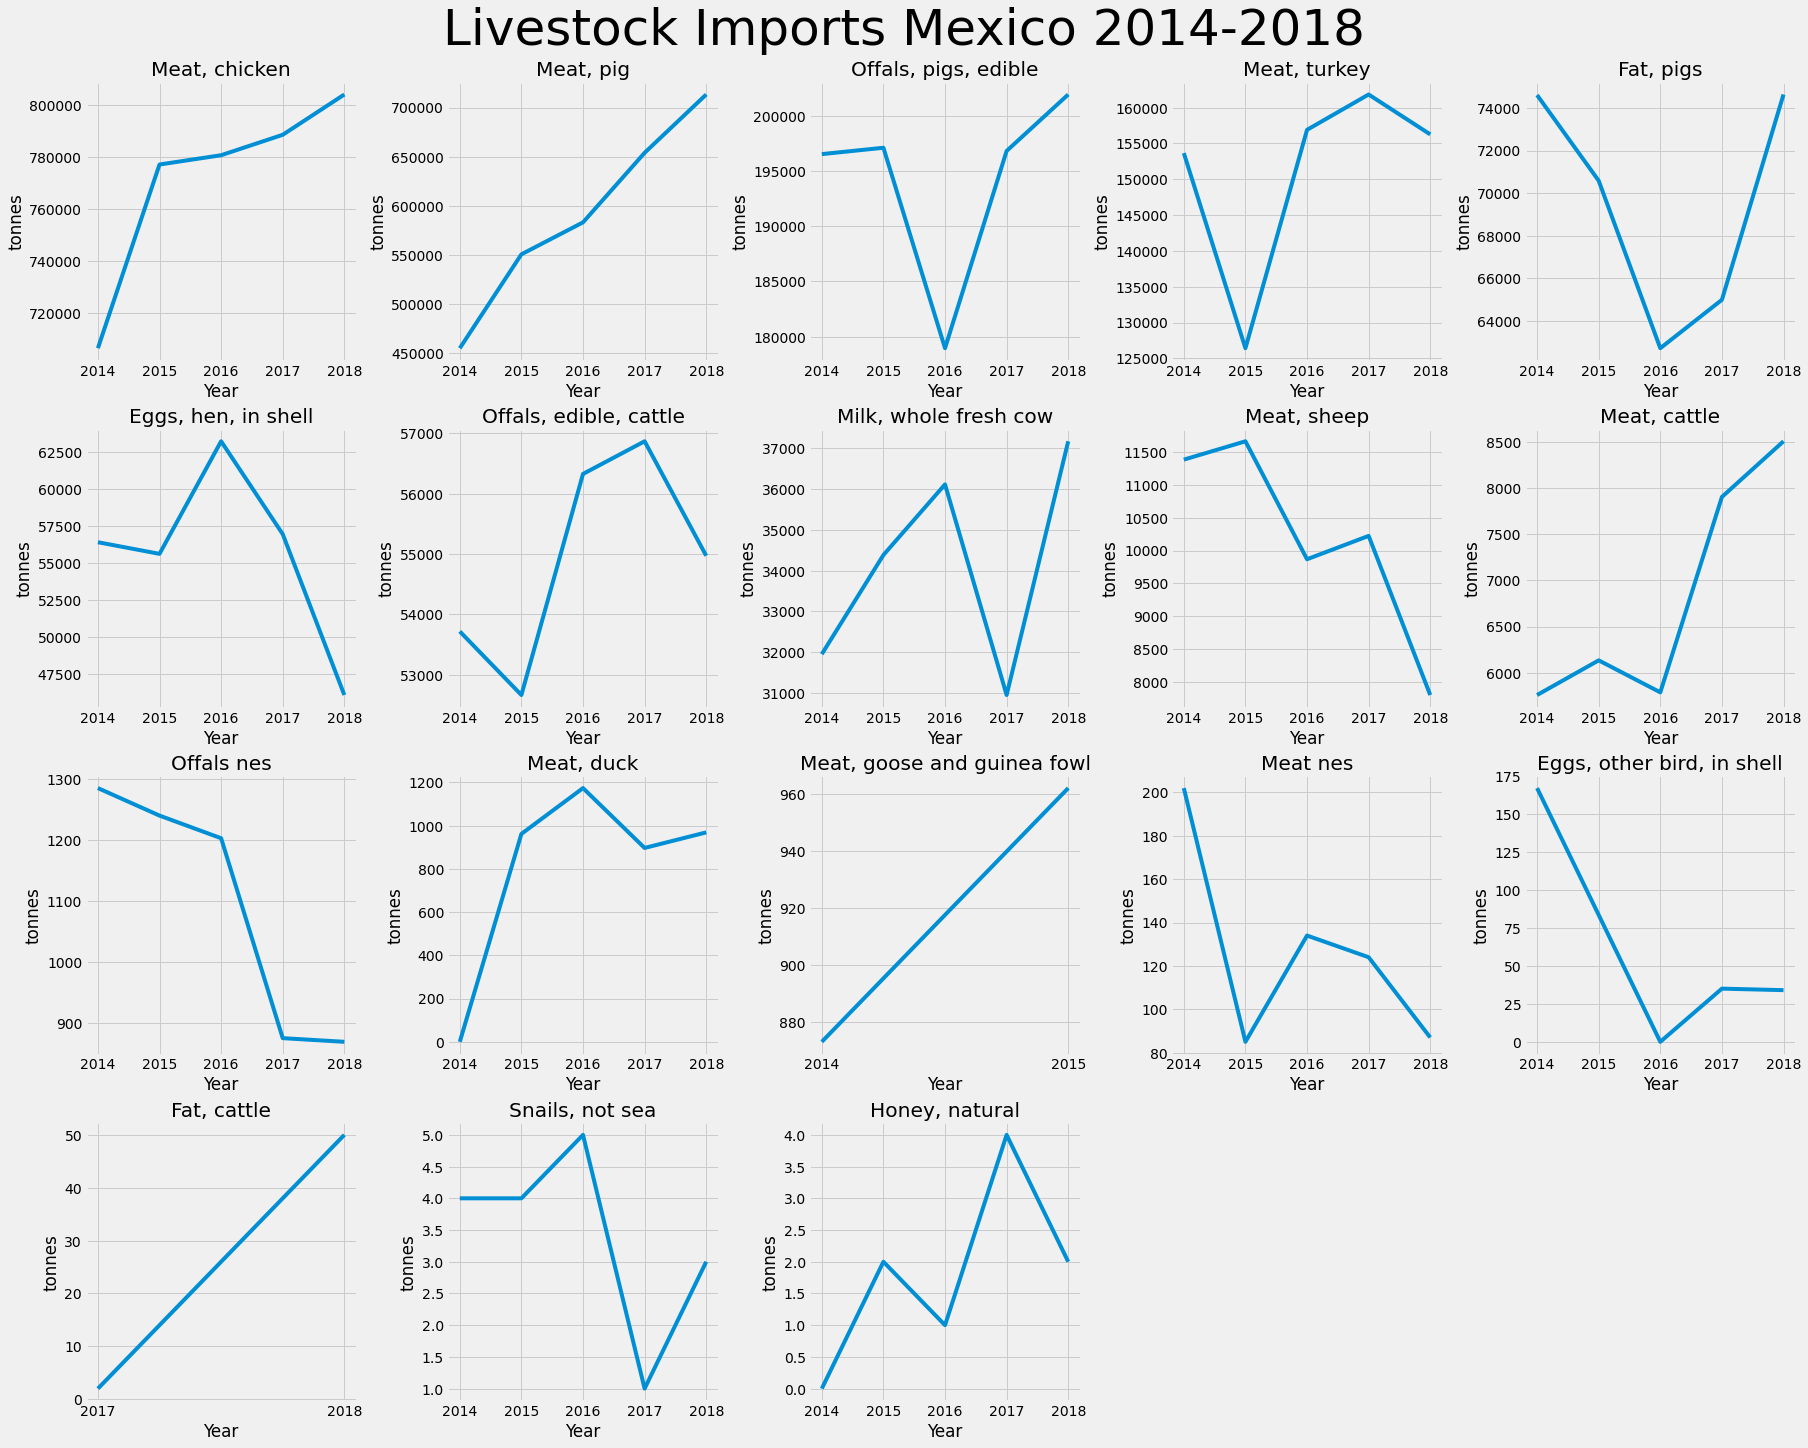

In [37]:
#here I've done the same for Imports

dfs_imports = df_dict['Import Quantity'].copy()

fig, axs = plt.subplots(4,5,figsize=(25,20),constrained_layout=True)
coord = (0,1,2,3)
coord2 = (0,1,2,3,4)
coords = product(coord, coord2)

for (key,df),i in zip(dfs_imports.items(), coords):
    axs[i].plot(df['Year'],df['Value'])
    axs[i].set_title('{}'.format(key))
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('{}'.format(df['Unit'].iloc[0]))
    axs[i].set_xticks(range(df['Year'].min(), df['Year'].max()+1, 1))
    axs[i].ticklabel_format(style='plain')
    
fig.delaxes(axs[3,3])
fig.delaxes(axs[3,4])
    
fig.suptitle('Livestock Imports Mexico 2014-2018',fontsize=50)    

plt.show()   

This is essentially a personally-crafted pipeline for breaking down big data sets into desirable and observable subsets. I'm able to apply this framework to any data set and adapt the approach based on needs. The best parts about this approach are the quick turnaround from data to visualization and the wide-angle lens on trends over time with categories, product groups, industries, institutions etc. 